In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

In [440]:
df = pd.read_csv('/Users/saptarshipal/DATA/ipl_dataset2013/IPL IMB381IPL2013.csv')
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [441]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [442]:
df1 = df.copy()
df1.drop(columns='Sl.NO.', axis =1, inplace = True)


In [443]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER NAME    130 non-null    object 
 1   AGE            130 non-null    int64  
 2   COUNTRY        130 non-null    object 
 3   TEAM           130 non-null    object 
 4   PLAYING ROLE   130 non-null    object 
 5   T-RUNS         130 non-null    int64  
 6   T-WKTS         130 non-null    int64  
 7   ODI-RUNS-S     130 non-null    int64  
 8   ODI-SR-B       130 non-null    float64
 9   ODI-WKTS       130 non-null    int64  
 10  ODI-SR-BL      130 non-null    float64
 11  CAPTAINCY EXP  130 non-null    int64  
 12  RUNS-S         130 non-null    int64  
 13  HS             130 non-null    int64  
 14  AVE            130 non-null    float64
 15  SR-B           130 non-null    float64
 16  SIXERS         130 non-null    int64  
 17  RUNS-C         130 non-null    int64  
 18  WKTS      

In [444]:
df1.shape

(130, 25)

In [445]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,130.0,2.092308,0.576627,1.0,2.0000,2.000,2.0000,3.00
T-RUNS,130.0,2166.715385,3305.646757,0.0,25.5000,542.500,3002.2500,15470.00
T-WKTS,130.0,66.530769,142.676855,0.0,0.0000,7.000,47.5000,800.00
ODI-RUNS-S,130.0,2508.738462,3582.205625,0.0,73.2500,835.000,3523.5000,18426.00
ODI-SR-B,130.0,71.164385,25.898440,0.0,65.6500,78.225,86.7900,116.66
ODI-WKTS,130.0,76.076923,111.205070,0.0,0.0000,18.500,106.0000,534.00
ODI-SR-BL,130.0,34.033846,26.751749,0.0,0.0000,36.600,45.3250,150.00
CAPTAINCY EXP,130.0,0.315385,0.466466,0.0,0.0000,0.000,1.0000,1.00
RUNS-S,130.0,514.246154,615.226335,0.0,39.0000,172.000,925.2500,2254.00
HS,130.0,47.430769,36.403624,0.0,16.0000,35.500,73.7500,158.00


In [446]:
#set the no.of columns on display

#pd.set_option('display.max_columns',7)

In [447]:
df1.head()


,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [448]:
type(list(df1.columns))

list

In [449]:
df1[0:5]

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [450]:
#negative indexing

df1[-5:]

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
125,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,0,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,3,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,109,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,278,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000
129,"Zoysa, DNT",2,SL,DC,Bowler,288,64,343,95.81,108,...,122.22,0,99,2,49.50,9.00,33.00,2008,100000,110000


In [451]:
df1['PLAYER NAME'][0:5]

0     Abdulla, YA
1    Abdur Razzak
2     Agarkar, AB
3       Ashwin, R
4    Badrinath, S
Name: PLAYER NAME, dtype: object

In [452]:
df1[['PLAYER NAME','COUNTRY']][0:5]

,PLAYER NAME,COUNTRY
0,"Abdulla, YA",SA
1,Abdur Razzak,BAN
2,"Agarkar, AB",IND
3,"Ashwin, R",IND
4,"Badrinath, S",IND


In [453]:
df1.iloc[0:5,2:7]

,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS
0,SA,KXIP,Allrounder,0,0
1,BAN,RCB,Bowler,214,18
2,IND,KKR,Bowler,571,58
3,IND,CSK,Bowler,284,31
4,IND,CSK,Batsman,63,0


In [454]:
df1.COUNTRY.value_counts()

IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
BAN     1
ZIM     1
Name: COUNTRY, dtype: int64

In [455]:
pd.crosstab(df1['AGE'],df1['PLAYING ROLE'])

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4,5,7,0
2,25,21,29,11
3,6,13,8,1


In [456]:
df1[['PLAYER NAME','SOLD PRICE']].sort_values('SOLD PRICE')[0:5]

,PLAYER NAME,SOLD PRICE
73,"Noffke, AA",20000
46,Kamran Khan,24000
0,"Abdulla, YA",50000
1,Abdur Razzak,50000
118,Van der Merwe,50000


In [457]:
df1[['PLAYER NAME','SOLD PRICE']].sort_values('SOLD PRICE',ascending = False)[0:5]

,PLAYER NAME,SOLD PRICE
93,"Sehwag, V",1800000
127,Yuvraj Singh,1800000
50,"Kohli, V",1800000
111,"Tendulkar, SR",1800000
113,"Tiwary, SS",1600000


In [458]:
df1['premium'] = df1['SOLD PRICE'] - df1['BASE PRICE']
df1[['SOLD PRICE','BASE PRICE','premium']].sort_values('SOLD PRICE', ascending = False)[0:5]

,SOLD PRICE,BASE PRICE,premium
93,1800000,400000,1400000
127,1800000,400000,1400000
50,1800000,150000,1650000
111,1800000,400000,1400000
113,1600000,100000,1500000


In [459]:
df1.groupby('AGE')['SOLD PRICE'].mean()

AGE
1    720250.000000
2    484534.883721
3    520178.571429
Name: SOLD PRICE, dtype: float64

In [460]:
soldprice_by_age_role = df1.groupby(['AGE','PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()
print(soldprice_by_age_role)

    AGE PLAYING ROLE    SOLD PRICE
0     1   Allrounder  5.875000e+05
1     1      Batsman  1.110000e+06
2     1       Bowler  5.177143e+05
3     2   Allrounder  4.494000e+05
4     2      Batsman  6.547619e+05
5     2       Bowler  3.979310e+05
6     2    W. Keeper  4.677273e+05
7     3   Allrounder  7.666667e+05
8     3      Batsman  4.576923e+05
9     3       Bowler  4.143750e+05
10    3    W. Keeper  7.000000e+05


In [461]:
cat_features = df1.columns[df1.dtypes == 'object']
cat_features

Index(['PLAYER NAME', 'COUNTRY', 'TEAM', 'PLAYING ROLE'], dtype='object')

In [462]:
num_features = df1.columns[df1.dtypes != 'object']
num_features

Index(['AGE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS',
       'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS',
       'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR',
       'BASE PRICE', 'SOLD PRICE', 'premium'],
      dtype='object')

In [463]:
df_num = df1[num_features]


<AxesSubplot: >

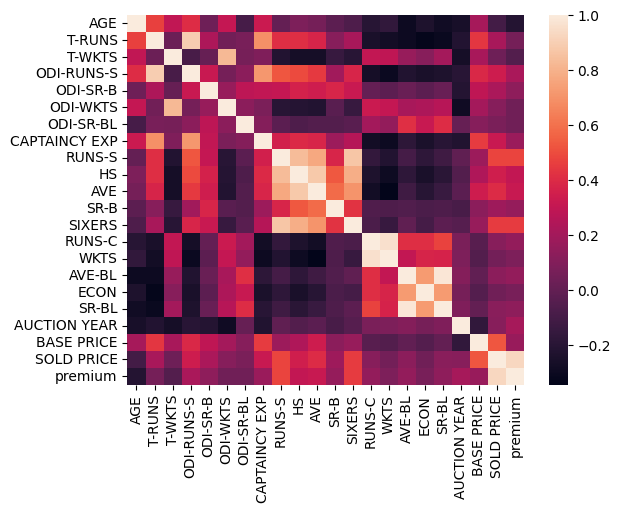

In [464]:
sns.heatmap(df_num.corr())

In [465]:
# Splitting the dataset in X and Y

y = df_num['SOLD PRICE']
X = df_num.drop(columns=['SOLD PRICE'], axis =1)

In [466]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123,shuffle = True)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(26, 21)
(104, 21)
(26,)
(104,)


In [467]:
#Linear regression model

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [468]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [469]:
model.predict(X_test)

array([800000., 100000., 450000., 625000., 800000., 650000., 175000.,
       725000., 350000., 700000., 250000., 250000., 290000., 950000.,
        50000.,  50000., 300000., 475000., 140000., 260000., 950000.,
       100000., 275000., 800000., 875000., 700000.])

In [479]:
print('Accuracy: ',model.score(X_test, y_test))

Accuracy:  1.0


In [480]:
y_train.head()

95     950000
129    110000
31     325000
42     475000
19     300000
Name: SOLD PRICE, dtype: int64

In [481]:
y_test.head()

4      800000
100    100000
128    450000
120    625000
71     800000
Name: SOLD PRICE, dtype: int64

In [471]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [472]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

const            2.980232e-08
AGE              4.656613e-10
T-RUNS          -3.907985e-14
T-WKTS           5.684342e-14
ODI-RUNS-S      -4.007905e-14
ODI-SR-B        -7.958079e-13
ODI-WKTS        -2.273737e-13
ODI-SR-BL        2.273737e-13
CAPTAINCY EXP   -1.891749e-10
RUNS-S           1.592060e-13
HS               8.526513e-13
AVE             -1.637090e-11
SR-B             2.273737e-12
SIXERS          -1.818989e-12
RUNS-C           3.597123e-13
WKTS            -8.867573e-12
AVE-BL          -1.818989e-12
ECON            -1.193712e-12
SR-BL            0.000000e+00
AUCTION YEAR    -7.275958e-12
BASE PRICE       1.000000e+00
premium          1.000000e+00
dtype: float64

In [473]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:             SOLD PRICE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.721e+27
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:21:58   Log-Likelihood:                 1718.1
No. Observations:                 104   AIC:                            -3392.
Df Residuals:                      82   BIC:                            -3334.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.98e-08   3.03e-06      0.010

In [474]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)


In [475]:
y_pred.head()

4      800000.0
100    100000.0
128    450000.0
120    625000.0
71     800000.0
dtype: float64